<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculate-vacancy-migration-energy-in-Cu-using-ACE-EMT" data-toc-modified-id="Calculate-vacancy-migration-energy-in-Cu-using-ACE-EMT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculate vacancy migration energy in Cu using ACE-EMT</a></span></li><li><span><a href="#Calculate-vacancy-formation-in-Cu-using-ACE-built-on-EMT" data-toc-modified-id="Calculate-vacancy-formation-in-Cu-using-ACE-built-on-EMT-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calculate vacancy formation in Cu using ACE built on EMT</a></span></li></ul></div>

## Calculate vacancy migration energy in Cu using ACE-EMT

In [72]:
import lammps_logfile as lmp_log
import numpy as np
from matplotlib import pyplot as plt

In [73]:
energy = []
n_images = 7
for i in np.arange(0,n_images):
        energy.append(lmp_log.File("log.lammps.{}".format(i)).get("PotEng")[-1])

Text(0, 0.5, 'Energy [eV]')

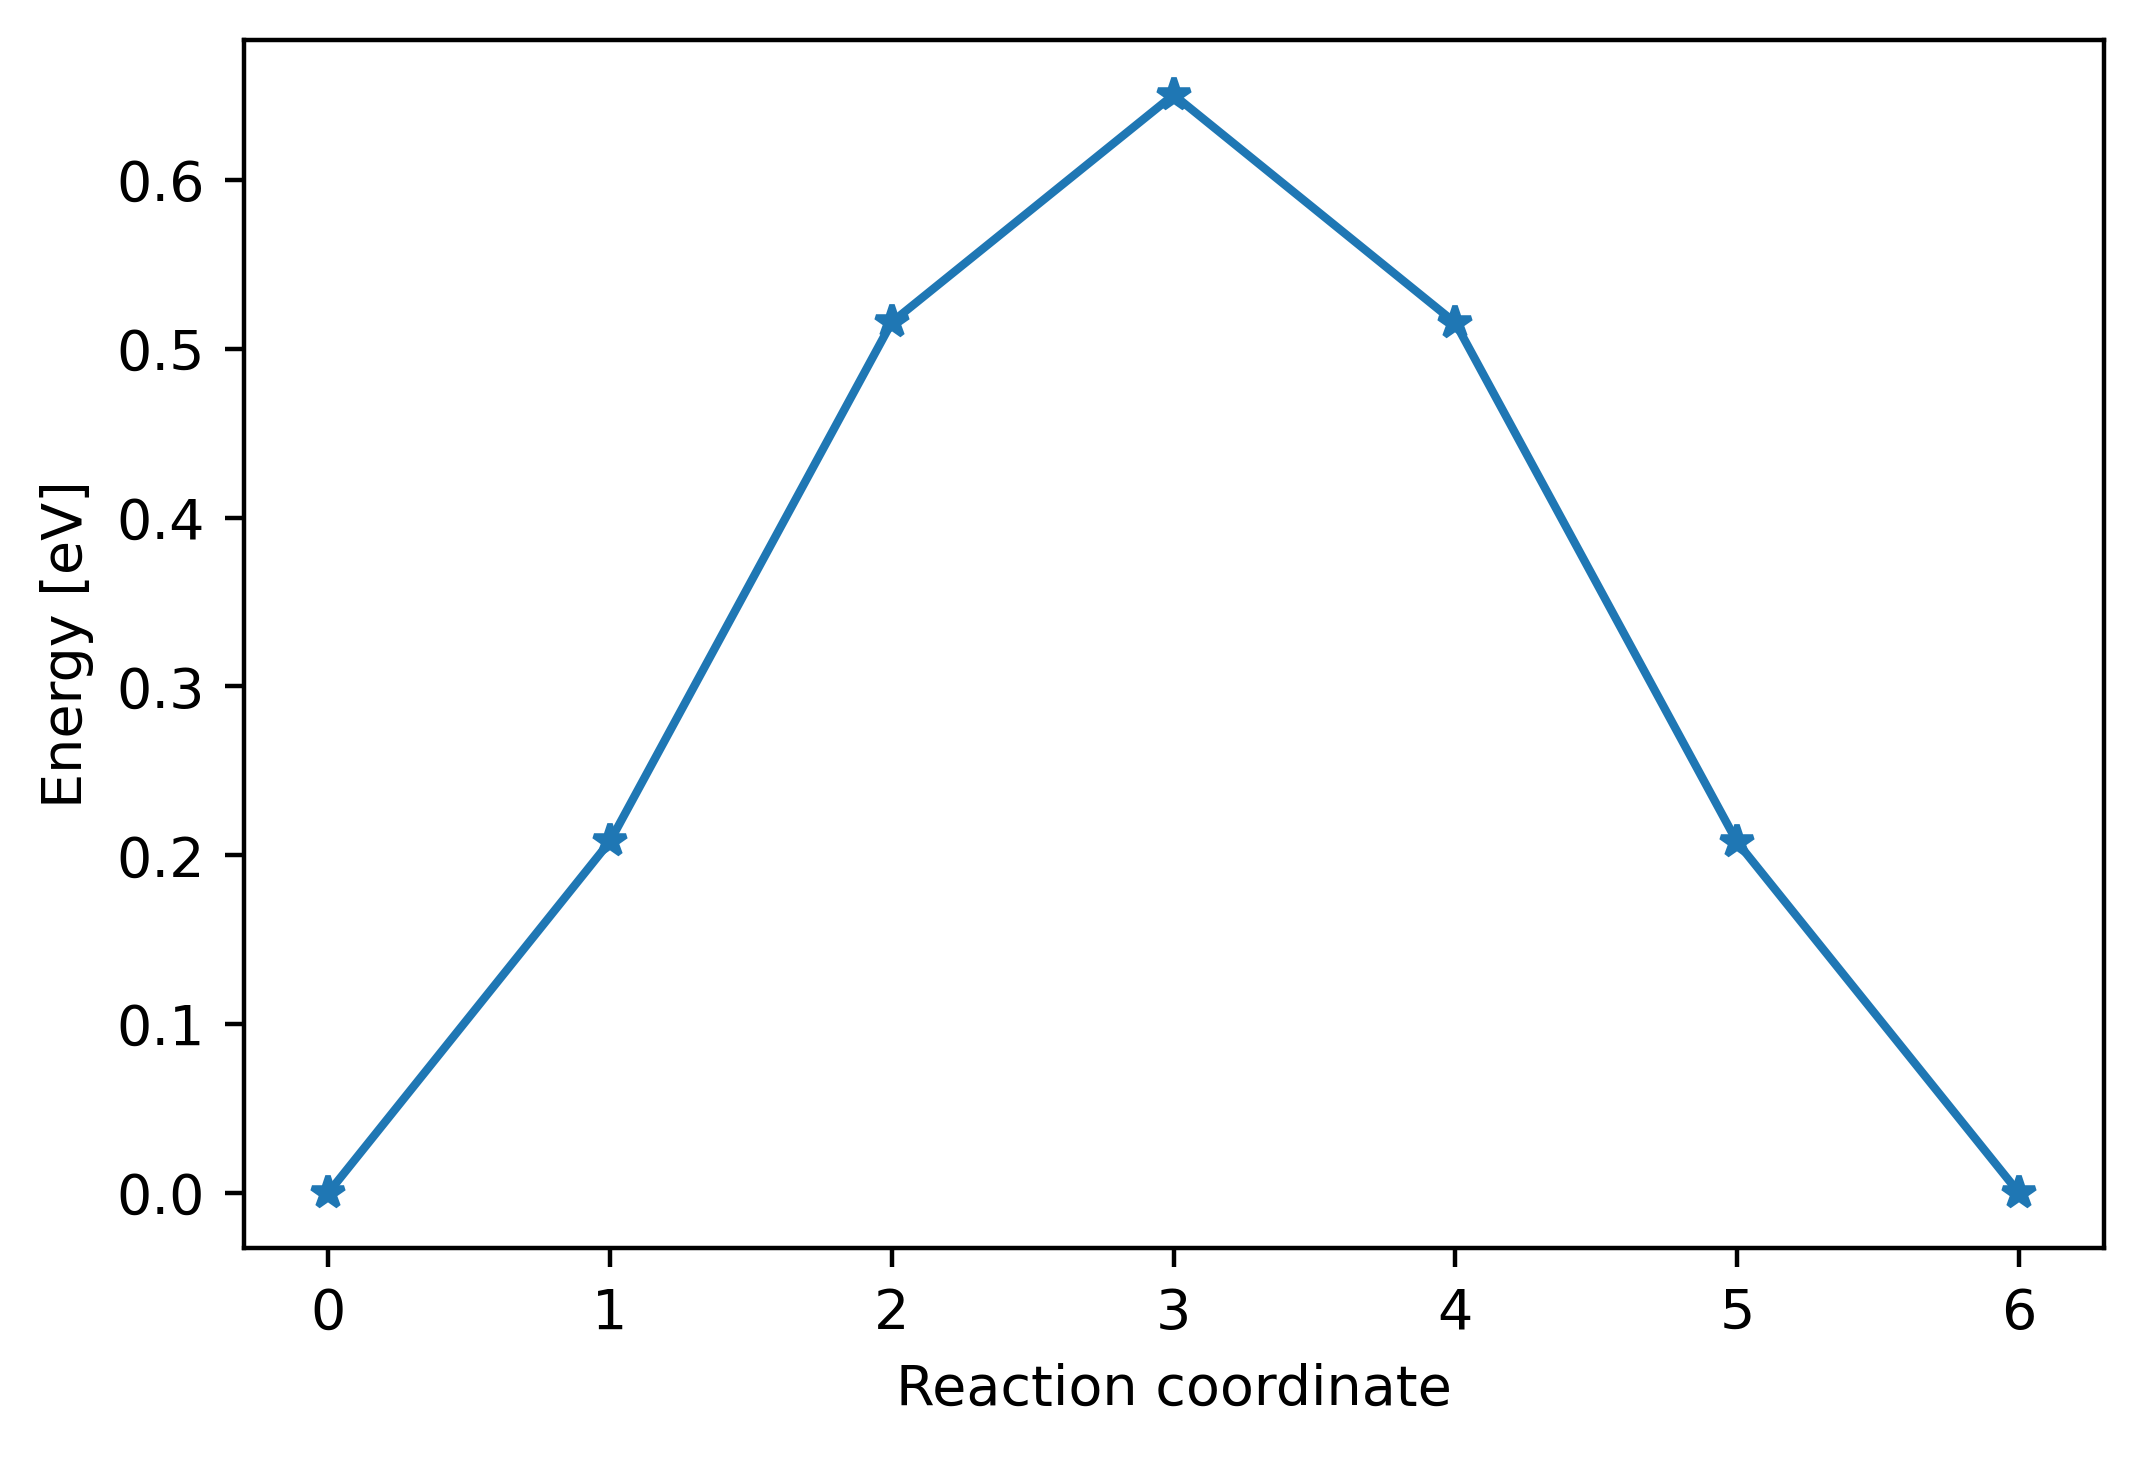

In [75]:
plt.figure(dpi=400)
plt.plot(energy - energy[0],'-*')
plt.xlabel("Reaction coordinate")
plt.ylabel("Energy [eV]")

## Calculate vacancy formation in Cu using ACE built on EMT

In [63]:
import numpy as np
from ase import Atoms
from ase.build import bulk
from ase.calculators.emt import EMT
from ase.eos import EquationOfState
from ase.io import read
from ase.io.trajectory import Trajectory
from ase.neb import NEB, NEBTools
from ase.optimize import MDMin
from ase.units import kJ
from ase.visualize import view
from matplotlib import pyplot as plt

In [65]:
a_lat_Cu_EMT = (4 * 11.567) ** (1 / 3)
a1 = bulk("Cu", "fcc", a=a_lat_Cu_EMT)
bulkCu = a1.repeat(6)
bulkCu.calc = EMT()

In [76]:
e_vac_f = -80.1758613197911 - 215 * bulkCu.get_potential_energy() / 4

In [81]:
e_vac_m = max(energy) - energy[0]

In [83]:
print("Formation energy of vac in Cu using ACE-EMT: {} eV".format(round(e_vac_f,2)))
print("Migration energy of vac in Cu using ACE-EMT: {} eV".format(round(e_vac_m,2)))

Formation energy of vac in Cu using ACE-EMT: 1.52 eV
Migration energy of vac in Cu using ACE-EMT: 0.65 eV
